#  Final Project Submission
Please fill out:

- Student name: Ethan Kunin
- Student pace: Full Time
- Scheduled project review date/time: March
- Instructor name: James Irving
- Blog post URL: https://github.com/kuninethan95/dsc-phase-1-project

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Questions and Conclusions

- Which directors generate the highest revenue per film?
- What month generates the highest revenue for films?
- What film length generates the highest revenue?

In [3]:
# import necessary libraries and packages

import os,glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [4]:
# display where the data is contained

folder = "/Users/ethankunin/Documents/Flatiron/Phase_1/Movie_Project1/dsc-phase-1-project/zippedData/"
os.listdir(folder)

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [5]:
files = glob.glob(f"{folder}*.csv*")

In [6]:
# Load in files and display preview

tables = {}
dashes='---'*25

for file in files:
    ## Save a variable-friendly version of the file name
    table_name = file.replace('.csv.gz','').split('/')[-1].replace('.','_')
    print(dashes)
    
    ## Load and preview dataframe
    print(f"Preview of {table_name}")
    tables[table_name] = pd.read_csv(file)
    display(tables[table_name].head(5))
    print()

---------------------------------------------------------------------------
Preview of imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



---------------------------------------------------------------------------
Preview of tmdb_movies


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



---------------------------------------------------------------------------
Preview of imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



---------------------------------------------------------------------------
Preview of imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



---------------------------------------------------------------------------
Preview of imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



---------------------------------------------------------------------------
Preview of imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



---------------------------------------------------------------------------
Preview of tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



---------------------------------------------------------------------------
Preview of bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



---------------------------------------------------------------------------
Preview of imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


# Description of each table with unique identifiers

- imdb_title_crew: id's to link crew members with titles

- tmdb_movies - titles and stats from IMDB

- imdb_title_akas - link between id and movie title

- imdb_title_ratings - link between title and IMDB ratings

- imdb_name_basics - name of cast member and id

- imdb_title_basics - movie title, id, and runtime

- tn_movie_budgets - movie title, release date, and earnings/costs

- bom_movie_gross - movie title, studio, and earnings

- imdb_title_principals - link between movie title and cast cast id

In [7]:
# Link each file to a Pandas dataframe

filepath0 = files[0]
imdb_title_crew = pd.read_csv(filepath0)

In [8]:
filepath1 = files[1]
tmdb_movies = pd.read_csv(filepath1)

In [9]:
filepath2 = files[2]
imdb_title_akas = pd.read_csv(filepath2)

In [10]:
filepath3 = files[3]
imdb_title_ratings = pd.read_csv(filepath3)

In [11]:
filepath4 = files[4]
imdb_name_basics = pd.read_csv(filepath4)

In [12]:
filepath5 = files[5]
imdb_title_basics = pd.read_csv(filepath5)

In [13]:
filepath6 = files[6]
tn_movie_budgets = pd.read_csv(filepath6)

In [14]:
filepath7 = files[7]
bom_movie_gross = pd.read_csv(filepath7)

In [15]:
filepath8 = files[8]
imdb_title_principals = pd.read_csv(filepath8)

# Analyze how runtime impacts revenue

In [16]:
# Merge movie budgets/earnings with titles to display runtime

movie_rt = tn_movie_budgets.merge(imdb_title_basics, left_on='movie', right_on='original_title', how='inner')

In [17]:
movie_rt.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"


In [18]:
movie_rt.info()

# Going to have to turn production_budget/domestic_gross/worldwide_gross into integers
# Only column with significant null values is runtime_minutues, may account for this by imputing the median

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3537 non-null   int64  
 1   release_date       3537 non-null   object 
 2   movie              3537 non-null   object 
 3   production_budget  3537 non-null   object 
 4   domestic_gross     3537 non-null   object 
 5   worldwide_gross    3537 non-null   object 
 6   tconst             3537 non-null   object 
 7   primary_title      3537 non-null   object 
 8   original_title     3537 non-null   object 
 9   start_year         3537 non-null   int64  
 10  runtime_minutes    3070 non-null   float64
 11  genres             3473 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 359.2+ KB


## Clean Data
- Sort for commercial release by only including films with production_budgets > $20,000000
- Only use movies from 2010 onwards
- Convert production_budget/domestic_gross/worldwide_gross into integers
- Impute runtime_minutes with either mean/median
- Check for outliers
- Feature engineer short/medium/long
- Drop unnecessary columns

In [19]:
def col_to_int(df, colm):
    df[colm] = df[colm].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', '')).astype('int')
    return df

In [20]:
col_to_int(movie_rt, 'production_budget')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000,"$229,024,295","$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,68,"Jul 6, 2001",Cure,10000,"$94,596","$94,596",tt5936960,Cure,Cure,2014,NaN,NaN
3533,70,"Apr 1, 1996",Bang,10000,$527,$527,tt6616538,Bang,Bang,2015,NaN,NaN
3534,73,"Jan 13, 2012",Newlyweds,9000,"$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,7000,$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [21]:
col_to_int(movie_rt, 'domestic_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,"$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000,229024295,"$655,945,209",tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,68,"Jul 6, 2001",Cure,10000,94596,"$94,596",tt5936960,Cure,Cure,2014,NaN,NaN
3533,70,"Apr 1, 1996",Bang,10000,527,$527,tt6616538,Bang,Bang,2015,NaN,NaN
3534,73,"Jan 13, 2012",Newlyweds,9000,4584,"$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,7000,0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [22]:
col_to_int(movie_rt, 'worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...
3532,68,"Jul 6, 2001",Cure,10000,94596,94596,tt5936960,Cure,Cure,2014,NaN,NaN
3533,70,"Apr 1, 1996",Bang,10000,527,527,tt6616538,Bang,Bang,2015,NaN,NaN
3534,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3535,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [23]:
# Filter out movies with production budgets under $20,000,000
movie_rt = movie_rt.loc[movie_rt['production_budget'] > 20000000]

In [24]:
# Feature Engineer year column. Not going to use DateTime yet because will want to engineer a seasonal column
# Convert year into an int
movie_rt['year'] = movie_rt['release_date'].map(lambda x: x[-4:])
movie_rt['year'] = movie_rt['year'].astype('int')

<ipython-input-24-b8c95b37f53e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_rt['year'] = movie_rt['release_date'].map(lambda x: x[-4:])
<ipython-input-24-b8c95b37f53e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_rt['year'] = movie_rt['year'].astype('int')


In [25]:
# Slice out movies from before 2010
movie_rt = movie_rt[movie_rt['year'] >= 2010]

In [26]:
# We have 8.2% of movies with null runtime_minutes
(movie_rt['runtime_minutes'].isna().sum())/len(movie_rt)* 100

8.018018018018019

In [27]:
# Check for duplicates
# 298 duplicates, upon inspection doesn't look like there's a reason other than inner join
#Drop if they contain the same movie, release date
movie_rt[movie_rt.duplicated(subset=['movie', 'release_date'])]
movie_rt.duplicated(subset=['movie', 'release_date']).sum()
movie_rt.drop

<bound method DataFrame.drop of       id  release_date                                        movie  \
0      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
1      3   Jun 7, 2019                                 Dark Phoenix   
2      4   May 1, 2015                      Avengers: Age of Ultron   
3      7  Apr 27, 2018                       Avengers: Infinity War   
4      9  Nov 17, 2017                               Justice League   
...   ..           ...                                          ...   
1578  69   Aug 4, 2017                                       Kidnap   
1579  72   Dec 9, 2011                    Tinker Tailor Soldier Spy   
1581  79   May 6, 2011                                   The Beaver   
1582  80  Feb 24, 2017                               Bitter Harvest   
1586  82   Feb 1, 2019                               Velvet Buzzsaw   

      production_budget  domestic_gross  worldwide_gross     tconst  \
0             410600000       241063875     

In [28]:
# Clear out movies with runtimes under 80 minutes
#https://screenwriting.io/what-is-a-feature-film/#:~:text=A%20modern%20feature%20is%20typically,than%2040%20minutes%20a%20feature.
movie_rt = movie_rt[(movie_rt['runtime_minutes'] > 80) & (movie_rt['runtime_minutes'] < 180)]

In [29]:
movie_rt.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
tconst               0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
year                 0
dtype: int64

In [30]:
np.quantile(movie_rt['runtime_minutes'], 0.66)

117.0

In [31]:
#Now we check again for null values

(movie_rt['runtime_minutes'].isna().sum())/len(movie_rt)* 100

0.0

In [32]:
# Categorize movie lenght by duration
# Use .33 and 0.66 quintile to distinguish lenght

def length(mins):
    if mins < 100:
        return 'short'
    elif mins < 120:
        return 'medium'
    else:
        return 'long'

In [33]:
movie_rt['duration'] = movie_rt['runtime_minutes'].map(length)

<ipython-input-33-612a18e56b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_rt['duration'] = movie_rt['runtime_minutes'].map(length)


In [34]:
# Most movies fall into the short category, then medium, then long
movie_rt.groupby('duration').count()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,year
duration,,,,,,,,,,,,,
long,273,273,273,273,273,273,273,273,273,273,273,273,273
medium,398,398,398,398,398,398,398,398,398,398,398,398,398
short,250,250,250,250,250,250,250,250,250,250,250,250,250


## Visualization A: Create boxplot to illustrate how runtime impacts revenue

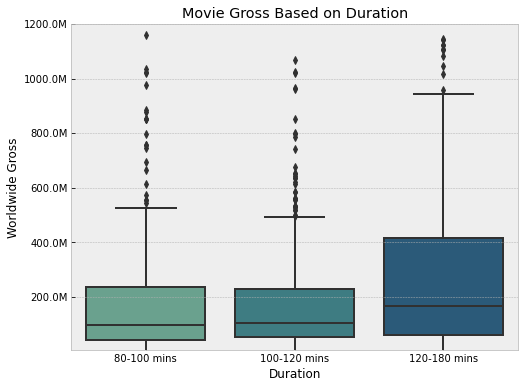

In [150]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)




#fig, ax = plt.subplots()
#ax.yaxis.set_major_formatter(formatter)
#https://stackoverflow.com/questions/61330427/set-y-axis-in-millions

with plt.style.context('bmh'): 
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.boxplot(x='duration', y='worldwide_gross', data=movie_rt, palette='crest', order=['short', 'medium', 'long'])
    ax.set_ylim(5000000, 1200000000)
    ax.set_title('Movie Gross Based on Duration')
    ax.set_ylabel('Worldwide Gross')
    ax.set_xlabel('Duration')
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    x_labs = ['80-100 mins', '100-120 mins', '120-180 mins']
    ax.set_xticklabels(x_labs);






# #fig, ax = plt.subplots()
# ax.yaxis.set_major_formatter(formatter)
    
#     y_labs = ['$200', '$400', '$600', '$800', '$1,000', '$1,200']

#     ax.set_yticklabels(y_labs)
    

### Conclusion 
- Long movies have the highest median
- Long movies have the largest IQR
- Short and medium length movies have similar distributions

## Visualization B: Create linear regression plot to illustrate how runtime impacts revenue

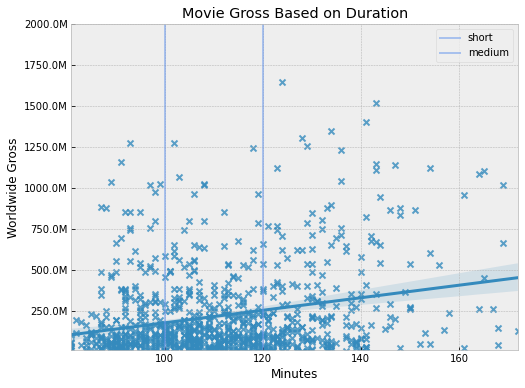

In [151]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.regplot(x='runtime_minutes', y='worldwide_gross', data=movie_rt, marker ="x")

    ax.set_ylim(10000000, 2000000000)

    ax.set_title('Movie Gross Based on Duration')
    ax.set_ylabel('Worldwide Gross')
    ax.set_xlabel('Minutes')
    ax.axvline(x=100, color='cornflowerblue', linestyle='solid', label='short', alpha=0.5)
    ax.axvline(x=120, color='cornflowerblue', linestyle='solid', label='medium', alpha=0.5)
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    #y_labs = ['$250', '$500', '$750', '$1000', '$1,250', '$1,500', '$1,750', '$2,000']
    #ax.set_yticklabels(y_labs)

    ax.legend();

### Conclusion 
- There is a positive trend between film duration and worldwide gross
- Long movies have more outlier values

# Analyze which directors generate the highest revenue
- Create table that links director movie
- Table that shows top directors by total revenue & average revenue
- Hue to show profitable/vs non-profitable on scatter plot of top 20 directors

In [37]:
# Merge to create table that shows primary name with nconst/tconst id

name_titles = imdb_name_basics.merge(imdb_title_principals, how='left', on='nconst')
name_titles.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,ordering,category,job,characters
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,9.0,producer,producer,NaN
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,7.0,composer,NaN,NaN
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,8.0,composer,NaN,NaN
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2387710,8.0,composer,NaN,NaN
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,7.0,composer,NaN,NaN


In [38]:
#Merge to create table that shows primary name and job function

names_movies = imdb_title_akas.merge(name_titles, how='inner', left_on='title_id', right_on='tconst')


## Clean Data
- Sort for only directors and US verion of movies
- Handle duplicates
- Handle null values

In [39]:
# Filter out non-directors

names_movies = names_movies[names_movies['category'] == 'director']

In [40]:
# Sort such that we are only showing the American version use 'US'

names_movies = names_movies[names_movies['region'] == 'US']

In [41]:
# Filter out directors who are no longer alive

names_movies = names_movies[names_movies['death_year'].isna()]
names_movies.head()

,title_id,ordering_x,title,region,language,types,attributes,is_original_title,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,ordering_y,category,job,characters
125,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,NaN,NaN
205,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,NaN,NaN
215,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,NaN,NaN
285,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,NaN,NaN
375,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0,nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,NaN,NaN


In [42]:
# Merge to create table that shows primary name and movie

movie_direct = movie_rt.merge(names_movies, how='left', left_on='movie', right_on='title')

In [43]:
movie_direct.columns
cols_to_remove = ['original_title', 'runtime_minutes', 'genres', 'year', 'duration', 'title_id', 
                  'title', 'types','nconst','primary_profession', 'known_for_titles',
                  'tconst_y', 'category', 'job', 'primary_title', 'start_year', 'ordering_x', 'attributes',
                   'language', 'is_original_title', 'ordering_y', 'characters']

In [44]:
movie_direct = movie_direct.drop(columns=(cols_to_remove))

In [45]:
# Check for duplicates from merge
(movie_direct.duplicated(subset=['release_date', 'movie'])).sum()

518

In [46]:
movie_direct = movie_direct.drop_duplicates(subset=['release_date', 'movie'])

In [103]:
# Remove null values

movie_direct[movie_direct['primary_name'].isna()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst_x,region,primary_name,birth_year,death_year


In [96]:
movie_direct = movie_direct.dropna(axis=0, subset=['primary_name'])

In [97]:
movie_direct.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst_x,region,primary_name,birth_year,death_year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,US,Rob Marshall,1960.0,NaN
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,US,Simon Kinberg,1973.0,NaN
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,US,Joss Whedon,1964.0,NaN
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,US,Joe Russo,1971.0,NaN
7,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,US,Zack Snyder,1966.0,NaN


## Analyze Top Directors
- Groupby sum/mean of domestic/worlwide gross
- Feature engineer T/F of profitable/unprofitable for scatter plot

In [98]:
# Prepare plots by grouping by top 20 director name, type of gross, mean and sum

tp_dgmean = movie_direct.groupby('primary_name')['domestic_gross'].mean().sort_values().nlargest(20).reset_index()
tp_dgmean

,primary_name,domestic_gross
0,Ryan Coogler,700059566.0
1,Colin Trevorrow,652270625.0
2,Joss Whedon,541142707.5
3,Angus MacLane,486295561.0
4,Joe Russo,448882263.0
5,J.A. Bayona,417719760.0
6,Patty Jenkins,412563408.0
7,Adam Green,400738009.0
8,Tim Miller,363070709.0
9,Artie Mandelberg,356461711.0


In [99]:
tp_dgsum = movie_direct.groupby('primary_name')['domestic_gross'].sum().sort_values().nlargest(20).reset_index()

In [100]:
tp_wgmean = movie_direct.groupby('primary_name')['worldwide_gross'].mean().sort_values().nlargest(20).reset_index()

In [101]:
tp_wgsum = movie_direct.groupby('primary_name')['worldwide_gross'].sum().sort_values().nlargest(20).reset_index()
tp_wgsum

,primary_name,worldwide_gross
0,Joe Russo,3902605502
1,Peter Jackson,2922948044
2,Joss Whedon,2920949860
3,Michael Bay,2911998250
4,Francis Lawrence,2543191543
5,Zack Snyder,2420920114
6,Kyle Balda,2195063923
7,Christopher Nolan,2001741385
8,Lee Unkrich,1866887623
9,Steven Spielberg,1762841457


## Create Visualization: Top 20 Directors, 4 Graphs to display WW/DOM and Mean/Sum

<ipython-input-127-43d536eb58ca>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels1)
<ipython-input-127-43d536eb58ca>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_labels2)


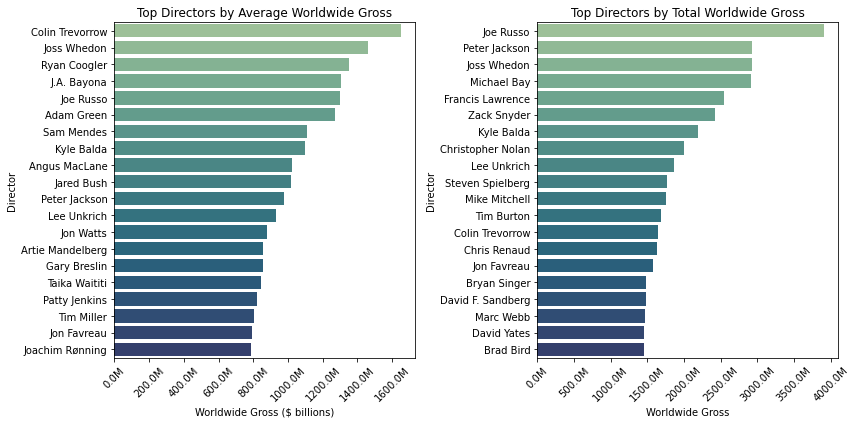

In [127]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

x_labels1 = ['$0.0', '$0.2', '$0.4', '$0.6', '$0.8', '$1.0', '$1.2', '$1.4', '$1.6']
x_labels2 = ['$0.0', '$0.5', '$1.0', '$1.5', '$2.0', '$2.5', '$3.0', '$3.5', '$4.0']
ax1 = sns.barplot(data=tp_wgmean, x='worldwide_gross', y='primary_name', ax=ax1, palette='crest')
ax1.set_title('Top Directors by Average Worldwide Gross')
ax1.set_xlabel('Worldwide Gross ($ billions)')
ax1.set_ylabel('Director')
ax1.set_xticklabels(x_labels1)
formatter = FuncFormatter(millions)
ax1.xaxis.set_major_formatter(formatter)
ax1.tick_params(axis='x', labelrotation = 45)


ax2 = sns.barplot(data=tp_wgsum, x='worldwide_gross', y='primary_name', ax=ax2, palette='crest')
ax2.set_title('Top Directors by Total Worldwide Gross')
ax2.set_xlabel('Worldwide Gross')
ax2.set_ylabel('Director')
ax2.set_xticklabels(x_labels2)
formatter = FuncFormatter(millions)
ax2.xaxis.set_major_formatter(formatter)
ax2.tick_params(axis='x', labelrotation = 45)
fig.tight_layout();

### Conclusion 
- Used mean because outliers are a valuable data point
- Many of the directors on the left chart also appear on the right

In [55]:
# Create list of top 20 directors by worldwide gross

td = list(tp_wgsum['primary_name'])

In [56]:
# Group table into top 20 directors and determine how profitable they are
# Profit column for absolute
# Ptf for was the movie profitable or not (domestic/worldwide)
# Pmarg for profit margin
dftd = movie_direct[movie_direct['primary_name'].isin(td)]

In [57]:
dftd2 = dftd.copy()

In [58]:
dftd2['profit'] = dftd2['worldwide_gross'] - dftd2['production_budget']

In [59]:
def profitable(num):
    if num > 0:
        return True
    elif num < 0:
        return False

In [60]:
dftd2['pwtf'] = dftd2['profit'].map(profitable)

In [61]:
dftd2['pmarg'] = (dftd2['worldwide_gross'] - dftd2['domestic_gross'])/(dftd2['worldwide_gross']) * 100

In [62]:
dftd2['profitdom'] = dftd2['domestic_gross'] - dftd2['production_budget']

In [63]:
dftd2['pdtf'] = dftd2['profitdom'].map(profitable).rename('Domestically Profitable')
dftd2.rename(columns={'pdtf': 'Domestically_Profitable'}, inplace=True)

In [64]:
dftd2.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst_x,region,primary_name,birth_year,death_year,profit,pwtf,pmarg,profitdom,Domestically_Profitable
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,US,Joss Whedon,1964.0,NaN,1072413963,True,67.284298,128405868,True
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,US,Joe Russo,1971.0,NaN,1748134200,True,66.856885,378815482,True


## Create Visualization: Analyze profitablity and relationship between budget and worldwide revenue for Top Directors

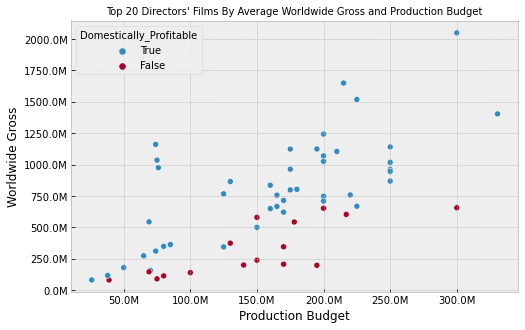

In [166]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(8,5))
    sns.scatterplot(x='production_budget', y='worldwide_gross', data=dftd2,
                    hue='Domestically_Profitable',hue_order=(True, False))

    ax.set_title('Top 20 Directors\' Films By Average Worldwide Gross and Production Budget', fontdict={'fontsize':10})
    ax.set_xlabel('Production Budget')
    ax.set_ylabel('Worldwide Gross')
    
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    formatter = FuncFormatter(millions)
    ax.xaxis.set_major_formatter(formatter)


### Conclusion 
- Positive relationship between production budget & worldwide gross
- Not all movies are domestically profitable
- All movies are profitable when comparing production budget to worldwide gross

# Analyze when the best time to release a movie is
- Create visualization based on month showing average earnings
- Feature engineer seasons as new column
- Analyze which season is generates the highest amount of revenue

## Clean Data: 
- create month column
- create season column

In [66]:
budgets_seasons = movie_direct.copy()

In [67]:
budgets_seasons.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst_x,region,primary_name,birth_year,death_year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,US,Rob Marshall,1960.0,NaN
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,US,Simon Kinberg,1973.0,NaN
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,US,Joss Whedon,1964.0,NaN
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,US,Joe Russo,1971.0,NaN
7,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,US,Zack Snyder,1966.0,NaN


In [68]:
# Add month column

budgets_seasons['month'] = budgets_seasons['release_date'].map(lambda x: x[0:3])

In [69]:
budgets_seasons.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst_x,region,primary_name,birth_year,death_year,month
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,US,Rob Marshall,1960.0,NaN,May
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,US,Simon Kinberg,1973.0,NaN,Jun
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,US,Joss Whedon,1964.0,NaN,May
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,US,Joe Russo,1971.0,NaN,Apr
7,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,US,Zack Snyder,1966.0,NaN,Nov


In [70]:
# Map month to numbers

month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov':11, 'Dec':12}
budgets_seasons['month_num'] = budgets_seasons['month'].map(month_map)

In [71]:
budgets_seasons.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst_x,region,primary_name,birth_year,death_year,month,month_num
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,US,Rob Marshall,1960.0,NaN,May,5
1,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,US,Simon Kinberg,1973.0,NaN,Jun,6


In [72]:
# Check for NaN

budgets_seasons.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst_x               0
region                 0
primary_name           0
birth_year           151
death_year           684
month                  0
month_num              0
dtype: int64

In [73]:
# Groupby month and display domestic/worlwide growth

g2p = budgets_seasons.groupby('month_num')[['domestic_gross', 'worldwide_gross']].agg('mean').reset_index()

In [74]:
g2p.head()

,month_num,domestic_gross,worldwide_gross
0,1,4.162344e+07,8.776932e+07
1,2,7.825234e+07,1.903106e+08
2,3,1.048599e+08,2.678451e+08
3,4,8.183108e+07,2.202146e+08
4,5,1.364501e+08,3.767707e+08


## Create Visualization: Side by Side bar plot showing how much revenue each month generates on average

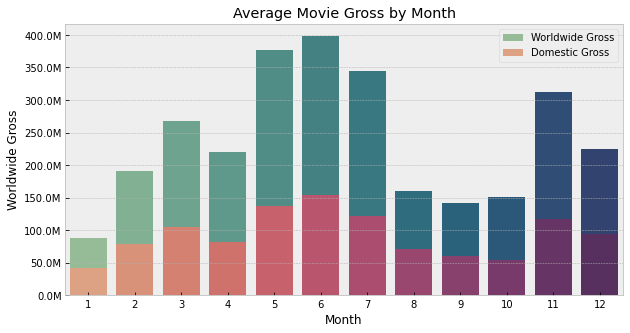

In [137]:
with plt.style.context('bmh'): 
    fig, ax = plt.subplots(figsize=(10,5))

    ax = sns.barplot(x='month_num', y="worldwide_gross", data=g2p, label='Worldwide Gross', palette='crest')
    ax = sns.barplot(x='month_num', y="domestic_gross", data=g2p, label= 'Domestic Gross', palette='flare')
    ax.legend()
    ax.set_xlabel('Month', color='black')
    ax.set_ylabel('Worldwide Gross')
    ax.set_title('Average Movie Gross by Month')
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)

#     y_labs4 = ['$0.0','$0.5','$1.0', '$1.5','$2.0', '$2.5','$3.0', '$3.5','$4.0']
#     ax.set_yticklabels(y_labs4)

#     t_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#     ax.set_xticklabels(t_labels);

### Conclusion 
- Summer and Winter month film releases appear to generate the most revenue
- Worldwide gross is greater than domestic gross in every month

In [76]:
# Feature engineer function that turns month into season

def seasons(month):
    if (month >= 3) & (month <= 5):
        return 'Spring'
    elif (month >= 6) & (month <=8):
        return 'Summer'
    elif (month >= 9) & (month <=11):
        return 'Fall'
    else:
        return 'Winter'

In [77]:
budgets_seasons['season'] = budgets_seasons['month_num'].map(seasons)

In [78]:
# budgets_seasons.head(2)
budgets_seasons['worldwide_gross'].max()

2048134200

## Create Visualization: Boxplot of worldwide gross based on season

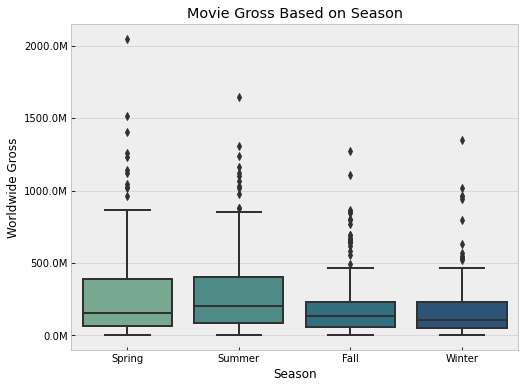

In [139]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax = sns.boxplot(x='season', y='worldwide_gross', data=budgets_seasons, palette='crest')
    ax.set_title('Movie Gross Based on Season')
    ax.set_ylabel('Worldwide Gross')
    ax.set_xlabel('Season')
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)



### Conclusion 
- Spring and Summer films have the highest medians
- Spring and Summer films have larger distributions

# Display how movies have performed the past 10 years through trends
- Group movies into median gross by year
- Prefer this to line graph because there's too much noise/daily movements to accurately show the trend
- Show how production costs have varied

In [80]:
budgets_years = budgets_seasons.copy()

In [81]:
# Feature engineer year column

budgets_years['year'] = budgets_years['release_date'].map(lambda x: x[-4:])
budgets_years['year'] = budgets_years['year'].astype(int)

In [82]:
#Ensure we are working with movies from the correct year

budgets_years['year'].unique()

array([2011, 2019, 2015, 2018, 2017, 2013, 2012, 2010, 2016, 2014])

In [83]:
# Groupby year and display domestic/worlwide growth/production cost

gby = budgets_years.groupby('year')[['production_budget','domestic_gross', 'worldwide_gross']].agg('mean', 'median').reset_index()

## Create Visualization: Lineplot of worldwide/domestic gross/cost based on year

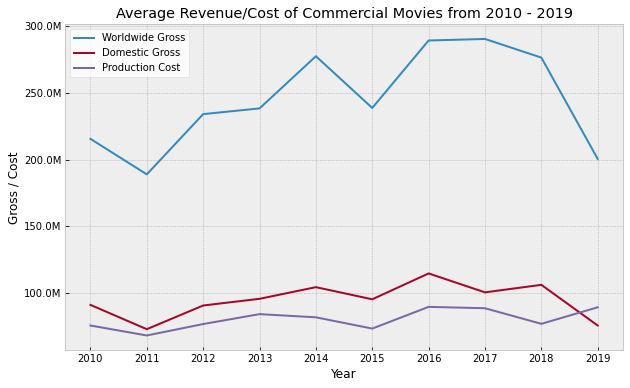

In [146]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(gby['year'], gby['worldwide_gross'], label='Worldwide Gross')
    ax.plot(gby['year'], gby['domestic_gross'], label='Domestic Gross')
    ax.plot(gby['year'], gby['production_budget'], label='Production Cost')

    ax.set_xlabel('Year')
    ax.set_ylabel('Gross / Cost')
    ax.set_title('Average Revenue/Cost of Commercial Movies from 2010 - 2019')
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    
    ax.legend(facecolor='white')
    ax.set_xticks(np.arange(2010, 2020, 1))